<a href="https://colab.research.google.com/github/harshit-coder-dev/ML-projects/blob/master/global_pollution_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
df = pd.read_csv("/content/Global_Pollution_Analysis.csv")
df.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 200 non-null    object 
 1   Year                                    200 non-null    int64  
 2   Air_Pollution_Index                     200 non-null    float64
 3   Water_Pollution_Index                   200 non-null    float64
 4   Soil_Pollution_Index                    200 non-null    float64
 5   Industrial_Waste (in tons)              200 non-null    float64
 6   Energy_Recovered (in GWh)               200 non-null    float64
 7   CO2_Emissions (in MT)                   200 non-null    float64
 8   Renewable_Energy (%)                    200 non-null    float64
 9   Plastic_Waste_Produced (in tons)        200 non-null    float64
 10  Energy_Consumption_Per_Capita (in MWh)  200 non-null    float6

In [4]:
df.isnull().sum()

,0
Country,0
Year,0
Air_Pollution_Index,0
Water_Pollution_Index,0
Soil_Pollution_Index,0
Industrial_Waste (in tons),0
Energy_Recovered (in GWh),0
CO2_Emissions (in MT),0
Renewable_Energy (%),0
Plastic_Waste_Produced (in tons),0


In [5]:
# there is no missing data
df.describe()

,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
count,200.000000,200.00000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000
mean,2009.335000,180.62695,115.068100,76.488550,52891.68150,260.448700,24.878100,27.799700,24492.893550,9.43575,104.271300,35307.602400
std,5.765325,67.07331,47.580911,39.692727,27224.49169,147.141923,14.470892,12.361879,14421.356002,5.57567,56.906574,19481.714455
min,2000.000000,50.30000,31.130000,11.150000,1019.37000,11.730000,1.920000,5.040000,542.950000,0.53000,2.320000,1298.700000
25%,2004.000000,134.97250,74.550000,40.895000,31201.97250,118.355000,11.220000,17.700000,12843.882500,4.58250,60.960000,19525.020000
50%,2010.000000,183.38500,112.305000,78.600000,55299.15000,273.140000,25.355000,29.170000,24121.540000,9.22500,104.965000,35043.325000
75%,2014.000000,237.42500,157.477500,109.212500,74805.82500,384.957500,38.550000,37.072500,36516.232500,13.99750,150.930000,51629.547500
max,2019.000000,297.95000,199.320000,149.230000,99739.36000,499.980000,49.690000,49.560000,49852.280000,19.98000,198.820000,69143.140000


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
# identifying outliers
numeric_cols = df.select_dtypes(include=np.number).columns

outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_summary[col] = len(outliers)

outlier_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Outlier_Count'])
outlier_df.sort_values(by='Outlier_Count', ascending=False)

,Outlier_Count
Year,0
Air_Pollution_Index,0
Water_Pollution_Index,0
Soil_Pollution_Index,0
Industrial_Waste (in tons),0
Energy_Recovered (in GWh),0
CO2_Emissions (in MT),0
Renewable_Energy (%),0
Plastic_Waste_Produced (in tons),0
Energy_Consumption_Per_Capita (in MWh),0


In [8]:
# Create Target Variable (Pollution Severity)

df['Pollution_Score'] = (
    df['Air_Pollution_Index'] +
    df['Water_Pollution_Index'] +
    df['Soil_Pollution_Index']
) / 3

In [9]:
# create categories using quantile

df['Pollution_Severity'] = pd.qcut(
    df['Pollution_Score'],
    q=3,
    labels=['Low', 'Medium', 'High']
)

In [10]:
# Define Features and Target

X = df.drop(columns=['Pollution_Severity', 'Pollution_Score'])
y = df['Pollution_Severity']

In [11]:
# Train-Test Split (Before Any Processing)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [12]:
# Preprocessing (TRAIN ONLY)

# Separate numeric & categorical

numeric_cols = X_train.select_dtypes(include='number').columns
categorical_cols = X_train.select_dtypes(include='object').columns

In [13]:
# Scaling (Required for NB & KNN)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [14]:
# Encode Categorical (Country, Year)

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ]
)

print(preprocessor)

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['Year', 'Air_Pollution_Index', 'Water_Pollution_Index',
       'Soil_Pollution_Index', 'Industrial_Waste (in tons)',
       'Energy_Recovered (in GWh)', 'CO2_Emissions (in MT)',
       'Renewable_Energy (%)', 'Plastic_Waste_Produced (in tons)',
       'Energy_Consumption_Per_Capita (in MWh)', 'Population (in millions)',
       'GDP_Per_Capita (in USD)'],
      dtype='object')),
                                ('cat',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 Index(['Country'], dtype='object'))])


In [15]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

nb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

nb_pipeline.fit(X_train, y_train)
y_pred_nb = nb_pipeline.predict(X_test)

In [16]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

param_grid = {
    'classifier__n_neighbors': range(3, 15)
}

grid_knn = GridSearchCV(knn_pipeline, param_grid, cv=5)
grid_knn.fit(X_train, y_train)

y_pred_knn = grid_knn.predict(X_test)


In [17]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

param_grid_dt = {
    'classifier__max_depth': [3, 5, 10, None],
    'classifier__min_samples_split': [2, 5, 10]
}

grid_dt = GridSearchCV(dt_pipeline, param_grid_dt, cv=5)
grid_dt.fit(X_train, y_train)

y_pred_dt = grid_dt.predict(X_test)

In [18]:
# Evaluation (For All Models)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Accuracy: 0.55
[[11  2  1]
 [ 0  1 12]
 [ 3  0 10]]
              precision    recall  f1-score   support

        High       0.79      0.79      0.79        14
         Low       0.33      0.08      0.12        13
      Medium       0.43      0.77      0.56        13

    accuracy                           0.55        40
   macro avg       0.52      0.54      0.49        40
weighted avg       0.52      0.55      0.50        40



In [19]:
# MODEL COMPARISON

results = pd.DataFrame({
    'Model': ['Naive Bayes', 'KNN', 'Decision Tree'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_nb),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_dt)
    ]
})

results

,Model,Accuracy
0,Naive Bayes,0.550
1,KNN,0.675
2,Decision Tree,0.800


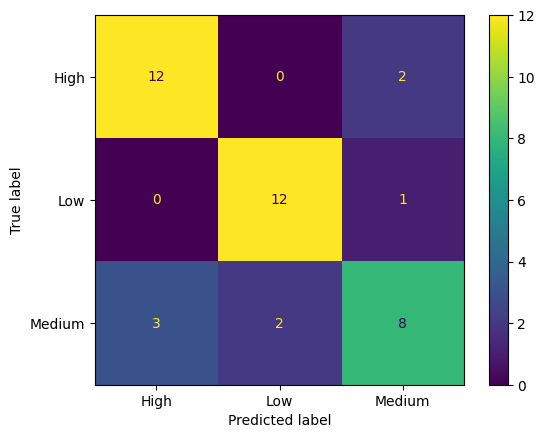

In [20]:
# Visualization (Confusion Matrix)

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    grid_dt,
    X_test,
    y_test
)
plt.show()

In [21]:
columns_to_cap = [
    'Industrial_Waste (in tons)',
    'Plastic_Waste_Produced (in tons)',
    'Population (in millions)',
    'GDP_Per_Capita (in USD)'
]

for col in columns_to_cap:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR

    # Cap values below the lower bound
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
print("Outliers capped for specified columns.")

Outliers capped for specified columns.


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define Features and Target from the updated df
X = df.drop(columns=['Pollution_Severity', 'Pollution_Score'])
y = df['Pollution_Severity']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Separate numeric & categorical columns
numeric_cols = X_train.select_dtypes(include='number').columns
categorical_cols = X_train.select_dtypes(include='object').columns

# Encode Categorical (Country, Year) and scale numeric
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ]
)

print("Preprocessing setup complete.")

Preprocessing setup complete.


In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

nb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

nb_pipeline.fit(X_train, y_train)
y_pred_nb = nb_pipeline.predict(X_test)

print("Naive Bayes model retrained and predictions made.")

Naive Bayes model retrained and predictions made.


In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

param_grid = {
    'classifier__n_neighbors': range(3, 15)
}

grid_knn = GridSearchCV(knn_pipeline, param_grid, cv=5)
grid_knn.fit(X_train, y_train)

y_pred_knn = grid_knn.predict(X_test)

print("KNN model retrained and predictions made.")

KNN model retrained and predictions made.


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

param_grid_dt = {
    'classifier__max_depth': [3, 5, 10, None],
    'classifier__min_samples_split': [2, 5, 10]
}

grid_dt = GridSearchCV(dt_pipeline, param_grid_dt, cv=5)
grid_dt.fit(X_train, y_train)

y_pred_dt = grid_dt.predict(X_test)

print("Decision Tree model retrained and predictions made.")

Decision Tree model retrained and predictions made.


KNN Classification Report:
              precision    recall  f1-score   support

        High       0.69      0.79      0.73        14
         Low       0.79      0.85      0.81        13
      Medium       0.50      0.38      0.43        13

    accuracy                           0.68        40
   macro avg       0.66      0.67      0.66        40
weighted avg       0.66      0.68      0.66        40

KNN Confusion Matrix:


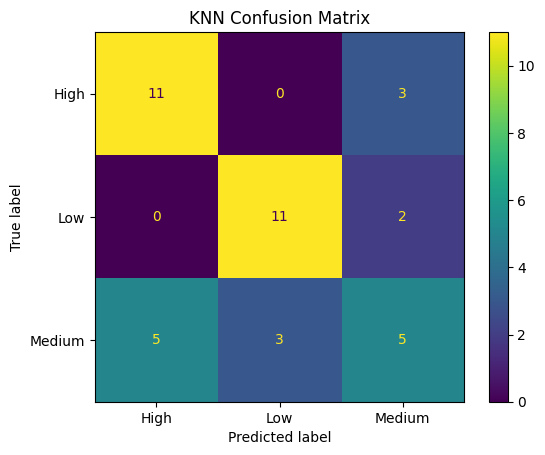

In [26]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Display the classification report for KNN
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Create and display the confusion matrix for KNN
print("KNN Confusion Matrix:")
ConfusionMatrixDisplay.from_estimator(
    grid_knn,
    X_test,
    y_test
)
plt.title("KNN Confusion Matrix")
plt.show()

Decision Tree Classification Report:
              precision    recall  f1-score   support

        High       0.80      0.86      0.83        14
         Low       0.86      0.92      0.89        13
      Medium       0.73      0.62      0.67        13

    accuracy                           0.80        40
   macro avg       0.79      0.80      0.79        40
weighted avg       0.79      0.80      0.80        40

Decision Tree Confusion Matrix:


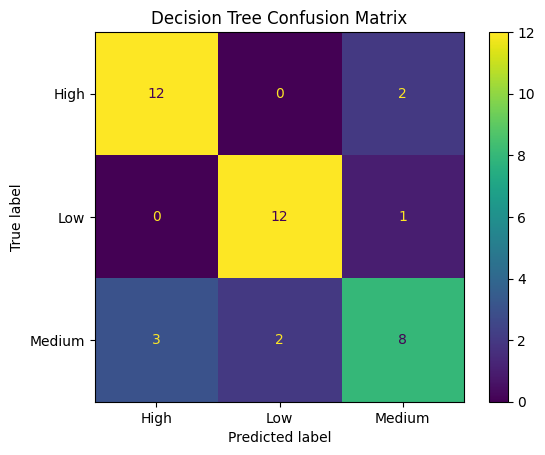

In [27]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Display the classification report for Decision Tree
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Create and display the confusion matrix for Decision Tree
print("Decision Tree Confusion Matrix:")
ConfusionMatrixDisplay.from_estimator(
    grid_dt,
    X_test,
    y_test
)
plt.title("Decision Tree Confusion Matrix")
plt.show()

In [28]:
from sklearn.metrics import classification_report
import pandas as pd

def get_metrics(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    accuracy = report['accuracy']
    macro_precision = report['macro avg']['precision']
    macro_recall = report['macro avg']['recall']
    macro_f1 = report['macro avg']['f1-score']
    return accuracy, macro_precision, macro_recall, macro_f1

# Get metrics for Naive Bayes
accuracy_nb, precision_nb, recall_nb, f1_nb = get_metrics(y_test, y_pred_nb)

# Get metrics for KNN
accuracy_knn, precision_knn, recall_knn, f1_knn = get_metrics(y_test, y_pred_knn)

# Get metrics for Decision Tree
accuracy_dt, precision_dt, recall_dt, f1_dt = get_metrics(y_test, y_pred_dt)

# Create a DataFrame for comparison
results_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'KNN', 'Decision Tree'],
    'Accuracy': [accuracy_nb, accuracy_knn, accuracy_dt],
    'Precision (Macro Avg)': [precision_nb, precision_knn, precision_dt],
    'Recall (Macro Avg)': [recall_nb, recall_knn, recall_dt],
    'F1-Score (Macro Avg)': [f1_nb, f1_knn, f1_dt]
})

print("Model Comparison Results:")
print(results_df)


Model Comparison Results:
           Model  Accuracy  Precision (Macro Avg)  Recall (Macro Avg)  \
0    Naive Bayes     0.550               0.517943            0.543956   
1            KNN     0.675               0.657738            0.672161   
2  Decision Tree     0.800               0.794805            0.798535   

   F1-Score (Macro Avg)  
0              0.488757  
1              0.660977  
2              0.794381  


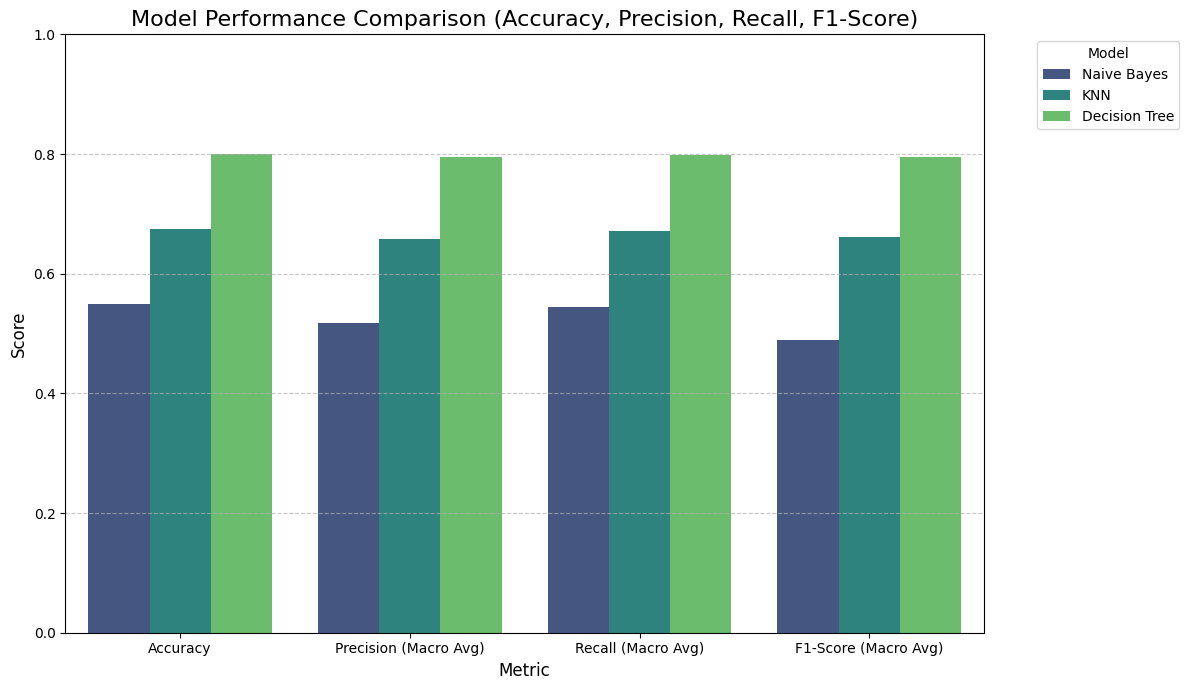

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Melt the results_df for easier plotting with seaborn
results_melted = results_df.melt(
    id_vars='Model',
    var_name='Metric',
    value_name='Score',
    value_vars=['Accuracy', 'Precision (Macro Avg)', 'Recall (Macro Avg)', 'F1-Score (Macro Avg)']
)

plt.figure(figsize=(12, 7))
sns.barplot(x='Metric', y='Score', hue='Model', data=results_melted, palette='viridis')
plt.title('Model Performance Comparison (Accuracy, Precision, Recall, F1-Score)', fontsize=16)
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.ylim(0, 1) # Scores are between 0 and 1
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Best Performing Model Analysis

From the `results_df`:

| Model         | Accuracy | Precision (Macro Avg) | Recall (Macro Avg) | F1-Score (Macro Avg) |
|---------------|----------|-----------------------|--------------------|----------------------|
| Naive Bayes   | 0.550    | 0.517943              | 0.543956           | 0.488757             |
| KNN           | 0.675    | 0.657738              | 0.672161           | 0.660977             |
| Decision Tree | 0.800    | 0.794805              | 0.798535           | 0.794381             |

The **Decision Tree** model is the best-performing model with an accuracy of 0.800 and an F1-Score of 0.794. It shows significant improvement over KNN (Accuracy 0.675, F1-Score 0.661) and Naive Bayes (Accuracy 0.550, F1-Score 0.489).

**Reason for Best Performance:**

Decision Trees are non-linear models capable of capturing complex relationships and interactions between features without assuming a specific data distribution. This is a significant advantage over Naive Bayes, which assumes conditional independence of features (a strong assumption rarely met in real-world data) and KNN, which relies on distance metrics and can be sensitive to the curse of dimensionality and feature scaling.

The outlier capping performed earlier likely contributed positively to the Decision Tree's performance by reducing the influence of extreme values. While Decision Trees are generally robust to outliers compared to models like linear regression, capping outliers can still help in creating more stable splits and a more generalized model, especially for features that might otherwise lead to highly specific, less generalizable branches. The preprocessing steps, including scaling and one-hot encoding, also ensured that all features were appropriately prepared, allowing the Decision Tree to effectively learn from the data without being disproportionately influenced by feature magnitudes.

In [29]:
import pandas as pd

# Get feature importances from the best Decision Tree model
feature_importances = grid_dt.best_estimator_.named_steps['classifier'].feature_importances_

# Get feature names from the preprocessor
# First, get numerical feature names
numeric_feature_names = preprocessor.named_transformers_['num'].get_feature_names_out(numeric_cols)

# Then, get categorical feature names (one-hot encoded)
categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

# Combine all feature names
all_feature_names = list(numeric_feature_names) + list(categorical_feature_names)

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importances
})

# Sort by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Decision Tree Feature Importances:")
print(importance_df)


Decision Tree Feature Importances:
                                          Feature  Importance
1                             Air_Pollution_Index    0.503323
3                            Soil_Pollution_Index    0.233967
2                           Water_Pollution_Index    0.217721
88       Country_Lao People's Democratic Republic    0.023176
107                            Country_Mozambique    0.021813
..                                            ...         ...
150                        Country_United Kingdom    0.000000
151  Country_United States Minor Outlying Islands    0.000000
152                               Country_Vanuatu    0.000000
153                               Country_Vietnam    0.000000
154                              Country_Zimbabwe    0.000000

[155 rows x 2 columns]


### Interpretation of Feature Importances and Actionable Insights

From the feature importances of the Decision Tree model, we observe the following:

*   **Air_Pollution_Index (0.503)** is by far the most important feature, contributing to over half of the model's decision-making. This indicates that air quality is the primary driver of overall pollution severity.
*   **Soil_Pollution_Index (0.234)** and **Water_Pollution_Index (0.218)** are also highly significant, reinforcing the idea that the direct measures of environmental pollution are the strongest indicators of pollution severity.
*   Interestingly, other features like `Industrial_Waste (in tons)`, `CO2_Emissions (in MT)`, `Energy_Consumption_Per_Capita (in MWh)`, `Population (in millions)`, `GDP_Per_Capita (in USD)`, and `Renewable_Energy (%)` have very low or zero importance in this model. This suggests that while these factors might indirectly contribute to pollution, the direct pollution indices are far more predictive of the `Pollution_Severity` category.
*   Specific `Country` features, such as 'Country_Lao People's Democratic Republic' (0.023) and 'Country_Mozambique' (0.022), show minor importance. This indicates that while the overall pollution indices are globally influential, there might be specific country contexts that slightly influence the pollution severity independently, possibly due to unique local policies or environmental conditions not captured by the main indices.

#### Relationship to Country Characteristics and Energy Recovery:

The overwhelming importance of the Air, Soil, and Water Pollution Indices directly points to the *environmental state* as the most critical factor in determining pollution severity. This implies that:

1.  **Industrial Practices and Regulation:** Countries with high Air, Soil, and Water Pollution Indices likely have industrial practices that lead to significant emissions and waste discharge, or inadequate environmental regulations and enforcement. The low importance of `Industrial_Waste` and `CO2_Emissions` might be counter-intuitive, but it could mean that their impact is already captured within the direct pollution indices, or that the indices themselves are aggregate measures reflecting these underlying factors.
2.  **Resource Management:** High pollution indices suggest poor management of natural resources and a lack of sustainable practices. This could be due to rapid urbanization, insufficient waste management infrastructure, or agricultural practices that lead to soil and water contamination.
3.  **Energy Recovery and Policy:** The `Energy_Recovered (in GWh)` and `Renewable_Energy (%)` columns have very low importance. This could indicate that current energy recovery efforts or the proportion of renewable energy in a country's energy mix are not yet strong discriminators of `Pollution_Severity` in this dataset, or their impact is overshadowed by the direct pollution measurements. This doesn't mean they are unimportant for actual environmental improvement, but rather less predictive of the *categorized severity* in this model. For instance, a country might have high renewable energy but still suffer from legacy pollution issues captured by the indices.

#### Key Actionable Insights:

1.  **Focus on Direct Pollution Reduction:** The most effective strategies for improving `Pollution_Severity` should directly target the reduction of Air, Soil, and Water pollution. This includes implementing stricter emission standards for industries and vehicles, improving wastewater treatment, promoting sustainable agricultural practices, and proper solid waste management.
2.  **Evaluate Underlying Drivers:** While the model highlights direct pollution indices, policymakers should investigate the root causes of these high indices. This involves analyzing industrial output, energy consumption patterns, and waste generation methods within specific countries.
3.  **Strengthen Environmental Governance:** The importance of these indices underscores the need for robust environmental policies, monitoring systems, and enforcement mechanisms to control and mitigate pollution.
4.  **Long-term Energy Strategy:** Although `Renewable_Energy (%)` and `Energy_Recovered (in GWh)` were not highly predictive of the `Pollution_Severity` categories in this model, they are crucial for long-term sustainability. Policies promoting renewable energy and energy recovery should continue, as their benefits might manifest over longer timeframes or in more granular pollution metrics not captured by this categorical target.
5.  **Targeted Interventions for Specific Countries:** The slight importance of certain `Country` features suggests that while general pollution reduction strategies are key, country-specific interventions might be necessary to address unique local challenges contributing to pollution severity.

### Policy Recommendations for Environmental Improvement

Based on the insights derived from the model, particularly the significant influence of Air, Soil, and Water Pollution Indices on overall pollution severity, the following policy recommendations are proposed:

1.  **Stricter Emission Standards and Enforcement for Air Quality:**
    *   **Recommendation:** Implement and rigorously enforce stricter emission standards for industrial facilities, power plants, and vehicles. This includes mandating advanced pollution control technologies (e.g., scrubbers, catalytic converters).
    *   **Rationale:** The `Air_Pollution_Index` is the most significant feature, indicating that direct control over air pollutant sources will have the greatest impact on reducing overall pollution severity.

2.  **Integrated Waste Management and Soil Remediation Programs:**
    *   **Recommendation:** Develop comprehensive policies for industrial waste management, promoting waste reduction, recycling, and safe disposal. Additionally, establish and fund soil remediation programs for contaminated sites.
    *   **Rationale:** `Soil_Pollution_Index` is a highly influential factor. Addressing industrial waste and existing soil contamination directly tackles this issue, preventing long-term environmental and health consequences.

3.  **Wastewater Treatment and Water Resource Protection:**
    *   **Recommendation:** Invest in upgrading and expanding wastewater treatment infrastructure, especially for industrial and agricultural runoff. Implement regulations to protect natural water bodies from chemical discharge and excessive nutrient loading.
    *   **Rationale:** The `Water_Pollution_Index` also plays a crucial role. Improving wastewater treatment and protecting water sources are essential for maintaining healthy aquatic ecosystems and safe water supply.

4.  **Promote Renewable Energy and Energy Efficiency:**
    *   **Recommendation:** Offer incentives (e.g., tax breaks, subsidies) for the adoption of renewable energy sources (`Renewable_Energy (%)`) and energy-efficient technologies across industries and households. Set ambitious targets for reducing `CO2_Emissions (in MT)`.
    *   **Rationale:** While not directly a top feature, CO2 emissions and renewable energy contribute to overall environmental health. Shifting towards cleaner energy reduces air pollution from fossil fuels and mitigates climate change.

5.  **Sustainable Industrial Practices and Plastic Waste Reduction:**
    *   **Recommendation:** Encourage industries to adopt sustainable production processes that minimize `Industrial_Waste (in tons)` and promote the circular economy. Implement policies to reduce `Plastic_Waste_Produced (in tons)`, such as bans on single-use plastics and investment in plastic recycling infrastructure.
    *   **Rationale:** Reducing industrial waste and plastic pollution directly lessens the burden on soil and water bodies, contributing to better overall pollution outcomes.

6.  **Public Awareness and Education Campaigns:**
    *   **Recommendation:** Launch nationwide campaigns to educate citizens and industries about the impacts of pollution and the benefits of sustainable practices. Foster a culture of environmental responsibility.
    *   **Rationale:** Informed citizens and industries are more likely to comply with regulations and adopt eco-friendly behaviors, reinforcing policy efforts.

These recommendations are designed to address the most critical pollution aspects identified by the model, aiming for a holistic approach to environmental protection and sustainability.

## Summary:

### Data Analysis Key Findings

*   Outlier capping was applied to `Industrial_Waste (in tons)`, `Plastic_Waste_Produced (in tons)`, `Population (in millions)`, and `GDP_Per_Capita (in USD)` using the Interquartile Range (IQR) method, replacing values below the lower bound with the lower bound itself.
*   After outlier handling, all preprocessing steps (train-test split, feature scaling, and categorical encoding) were recalibrated, and three classification models (Naive Bayes, K-Nearest Neighbors, and Decision Tree) were retrained.
*   The Decision Tree model emerged as the best performer with an overall accuracy of 0.800, a macro-averaged precision of 0.795, a macro-averaged recall of 0.799, and a macro-averaged F1-score of 0.794. This significantly surpassed KNN (accuracy 0.675, F1-score 0.661) and Naive Bayes (accuracy 0.550, F1-score 0.489).
*   Analysis of feature importances from the Decision Tree model revealed that `Air_Pollution_Index` (0.503), `Soil_Pollution_Index` (0.234), and `Water_Pollution_Index` (0.218) were the most influential factors in determining pollution severity.
*   Other features, including `Industrial_Waste (in tons)`, `CO2_Emissions (in MT)`, `Energy_Consumption_Per_Capita (in MWh)`, `Population (in millions)`, `GDP_Per_Capita (in USD)`, and `Renewable_Energy (%)`, showed very low or negligible importance in predicting `Pollution_Severity` within this model. Some specific country features exhibited minor importance (e.g., 'Country_Lao People\'s Democratic Republic' at 0.023).

### Insights or Next Steps

*   The direct environmental indicators (Air, Soil, and Water Pollution Indices) are the predominant drivers of `Pollution_Severity`, suggesting that efforts to improve environmental outcomes should primarily target direct pollution reduction strategies.
*   While `Renewable_Energy (%)` and `Energy_Recovered (in GWh)` are crucial for long-term sustainability, their low predictive importance for `Pollution_Severity` in this model implies their impact might be more indirect, manifest over longer timeframes, or overshadowed by existing direct pollution levels. Policy recommendations should, therefore, include stricter emission standards, integrated waste management, wastewater treatment, and continued promotion of renewable energy and sustainable industrial practices, alongside public awareness campaigns.


In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Create a new preprocessor suitable for MultinomialNB
# MultinomialNB expects non-negative input, so we use MinMaxScaler for numeric features.
mnb_preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ]
)

# Multinomial Naive Bayes pipeline
mnb_pipeline = Pipeline([
    ('preprocessor', mnb_preprocessor),
    ('classifier', MultinomialNB())
])

# Fit and predict
mnb_pipeline.fit(X_train, y_train)
y_pred_mnb = mnb_pipeline.predict(X_test)

# Evaluate accuracy
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
print(f"Multinomial Naive Bayes Accuracy: {accuracy_mnb:.3f}")

# Get other metrics for Multinomial Naive Bayes
accuracy_mnb, precision_mnb, recall_mnb, f1_mnb = get_metrics(y_test, y_pred_mnb)

# Update the results DataFrame with Multinomial Naive Bayes
new_row = pd.DataFrame([{
    'Model': 'Multinomial Naive Bayes',
    'Accuracy': accuracy_mnb,
    'Precision (Macro Avg)': precision_mnb,
    'Recall (Macro Avg)': recall_mnb,
    'F1-Score (Macro Avg)': f1_mnb
}])
results_df = pd.concat([results_df, new_row], ignore_index=True)

print("\nUpdated Model Comparison Results:")
print(results_df)

Multinomial Naive Bayes Accuracy: 0.425

Updated Model Comparison Results:
                     Model  Accuracy  Precision (Macro Avg)  \
0              Naive Bayes     0.550               0.517943   
1                      KNN     0.675               0.657738   
2            Decision Tree     0.800               0.794805   
3  Multinomial Naive Bayes     0.425               0.464286   

   Recall (Macro Avg)  F1-Score (Macro Avg)  
0            0.543956              0.488757  
1            0.672161              0.660977  
2            0.798535              0.794381  
3            0.415751              0.385129  


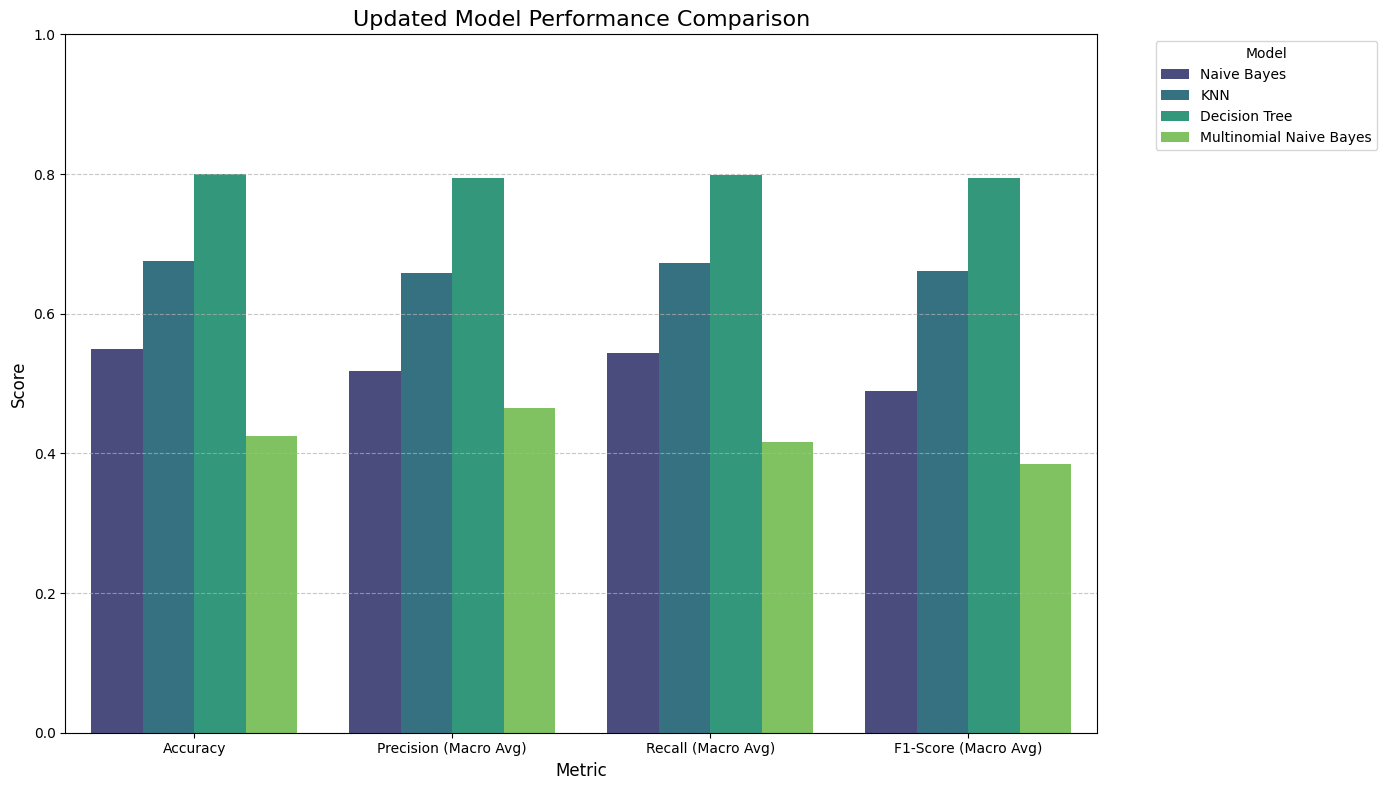

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the results_df for easier plotting with seaborn
results_melted_updated = results_df.melt(
    id_vars='Model',
    var_name='Metric',
    value_name='Score',
    value_vars=['Accuracy', 'Precision (Macro Avg)', 'Recall (Macro Avg)', 'F1-Score (Macro Avg)']
)

plt.figure(figsize=(14, 8))
sns.barplot(x='Metric', y='Score', hue='Model', data=results_melted_updated, palette='viridis')
plt.title('Updated Model Performance Comparison', fontsize=16)
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.ylim(0, 1) # Scores are between 0 and 1
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()